# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from config import weather_api_key
from config import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        lat = city_weather["coord"]["lat"]
        lng = city_weather["coord"]["lon"]
        temp_max = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": temp_max,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | ko pha ngan
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | machico
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | santa cruz
Processing Record 10 of Set 1 | smithers
Processing Record 11 of Set 1 | melfort
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | grand falls-windsor
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | hadibu
Processing Record 18 of Set 1 | angra do heroismo
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | new glasgow
Processing Record 21 of Set 1 | harper
Processing Record 22 of Set 1 | haiku-pauwela

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [24]:
# Output File (CSV)
city_data_df.to_csv("../output_data/cities.csv", index=False)

In [25]:
# Read exported data
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display the saved data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,-6.27,73,20,2.06,US,1712684970
1,ko pha ngan,9.7578,100.0291,27.02,74,31,4.70,TH,1712684970
2,vilyuchinsk,52.9306,158.4028,3.29,99,100,4.96,RU,1712684971
3,waitangi,-43.9535,-176.5597,14.90,92,14,2.68,NZ,1712684971
4,vorgashor,67.5833,63.9500,-26.78,100,9,0.34,RU,1712684971


In [26]:
# Show statistical description of the data set
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.00000,551.000000,551.000000,5.510000e+02
mean,19.160951,19.258717,16.645027,69.53176,57.139746,4.049365,1.712685e+09
std,33.330965,89.707102,12.251178,21.89924,37.107761,2.703613,8.555126e+01
min,-54.800000,-176.559700,-26.780000,7.00000,0.000000,0.000000,1.712685e+09
25%,-8.654850,-57.265250,9.915000,56.00000,20.000000,2.060000,1.712685e+09
50%,23.650000,26.355800,18.960000,74.00000,67.000000,3.600000,1.712685e+09
75%,48.102300,92.158350,26.280000,86.50000,96.000000,5.350000,1.712685e+09
max,78.218600,179.383300,39.180000,100.00000,100.000000,16.620000,1.712685e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

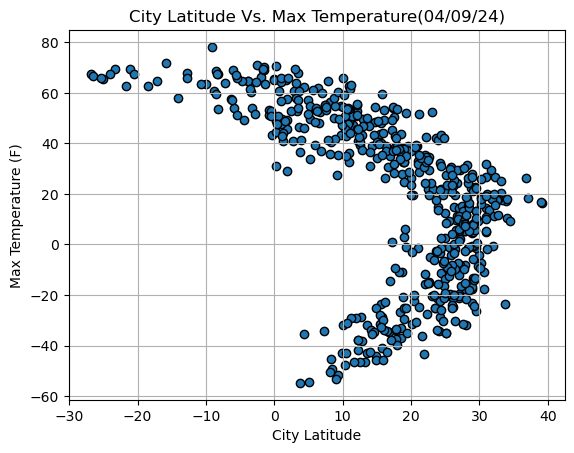

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"],
            city_data_df["Lat"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("City Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

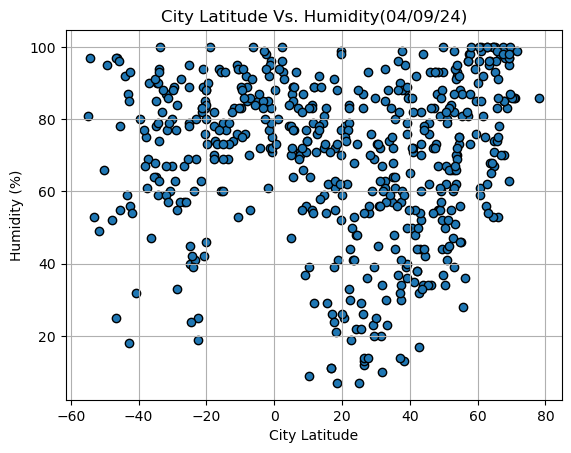

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("City Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

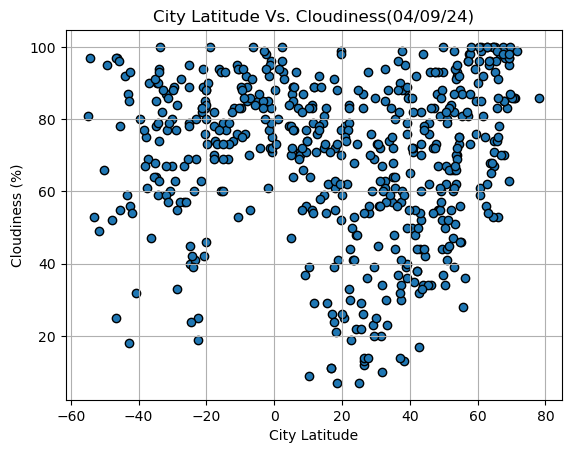

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

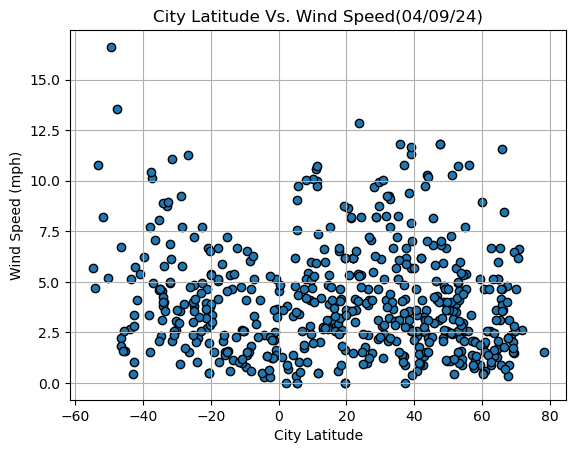

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define northern and southern hemisphere 
North_hem = city_data_df.loc[city_data_df["Lat"]>=0]
South_hem = city_data_df.loc[city_data_df["Lat"]<0]

Northern Hemisphere: Temperature vs. Latitude Linear Regression

r-square: 0.7070941898892262


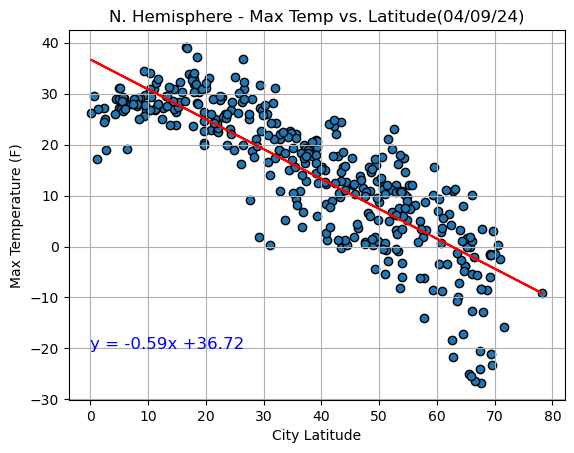

r-square > 0.7. The city latitue at northern hemisphere shows strong correlation with max temperature negative proportionally


In [68]:
# Declare variables 
x_values = North_hem["Lat"]
y_values = North_hem["Max Temp"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("N. Hemisphere - Max Temp vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.annotate(line_eq, xy=(0,-20),fontsize=12,color="blue")

#Save the figure
plt.savefig("../output_data/N_temp_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square > 0.7. The city latitue at northern hemisphere shows strong correlation with max temperature negative proportionally")

Southern Hemisphere: Temperature vs. Latitude Linear Regression

r-square: 0.5408299653776854


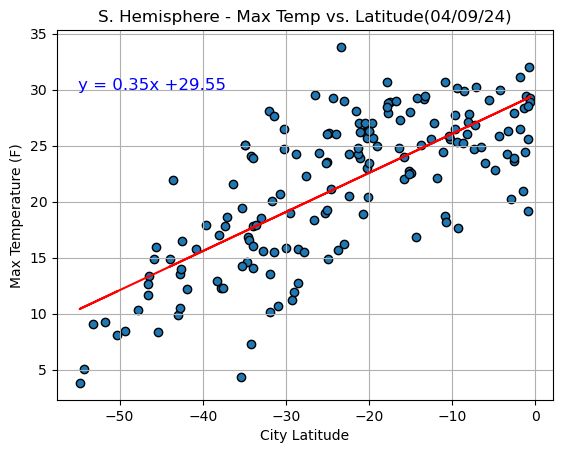

r-square < 0.7. The city latitue at southern hemisphere shows no strong correlation with max temperature


In [48]:
# Declare variables 
x_values = South_hem["Lat"]
y_values = South_hem["Max Temp"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("S. Hemisphere - Max Temp vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.annotate(line_eq,xy=(-55,30),fontsize=12,color="blue")

#Save the figure
plt.savefig("../output_data/S_temp_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square < 0.7. The city latitue at southern hemisphere shows no strong correlation with max temperature")


Northern Hemisphere: Humidity vs. Latitude Linear Regression

r-square: 0.05231501729653794


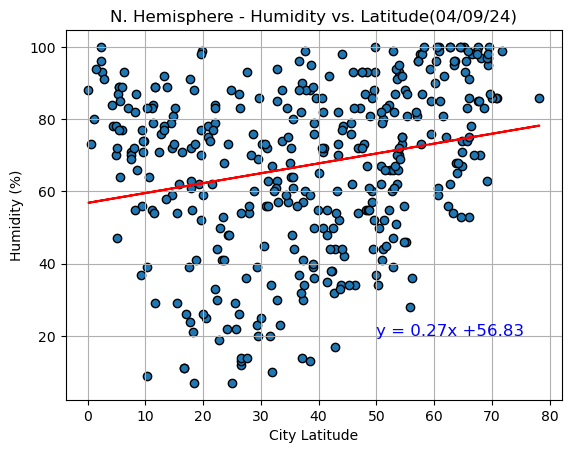

r-square << 0.7. The city latitue at northern hemisphere shows no correlation with humidity


In [53]:
# Declare variables 
x_values = North_hem["Lat"]
y_values = North_hem["Humidity"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("N. Hemisphere - Humidity vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.annotate(line_eq,xy=(50,20),fontsize=12,color="blue")

#Save the figure
plt.savefig("../output_data/N_Humidity_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at northern hemisphere shows no correlation with humidity")

Southern Hemisphere: Humidity vs. Latitude Linear Regression 

r-square: 0.054071870816506745


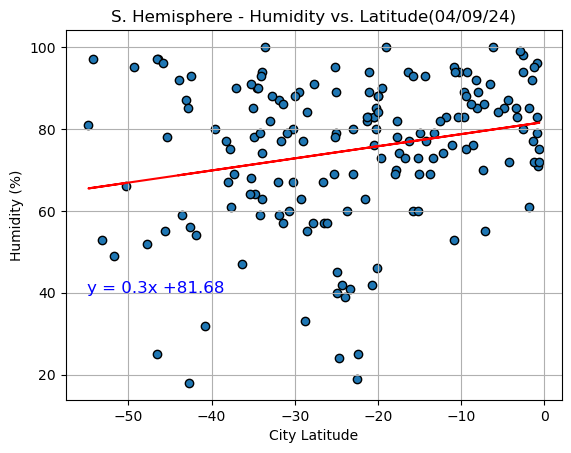

r-square << 0.7. The city latitue at southern hemisphere shows no correlation with humidity


In [56]:
# Declare variables 
x_values = South_hem["Lat"]
y_values = South_hem["Humidity"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("S. Hemisphere - Humidity vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.annotate(line_eq,xy=(-55,40),fontsize=12,color="blue")

#Save the figure
plt.savefig("../output_data/S_Humidity_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at southern hemisphere shows no correlation with humidity")

Northern Hemisphere: Cloudiness vs. Latitude Linear Regression

r-square: 0.01531750353940447


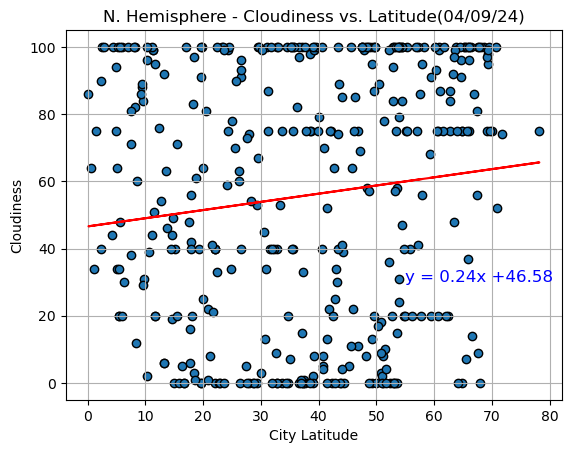

r-square << 0.7. The city latitue at northern hemisphere shows no correlation with Cloudiness


In [58]:
# Declare variables 
x_values = North_hem["Lat"]
y_values = North_hem["Cloudiness"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("N. Hemisphere - Cloudiness vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.annotate(line_eq,xy=(55,30),fontsize=12,color="blue")

#Save the figure
plt.savefig("../output_data/N_Cloudiness_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at northern hemisphere shows no correlation with Cloudiness")

Southern Hemisphere: Cloudiness vs. Latitude Linear Regression

r-square: 0.018806820781337948


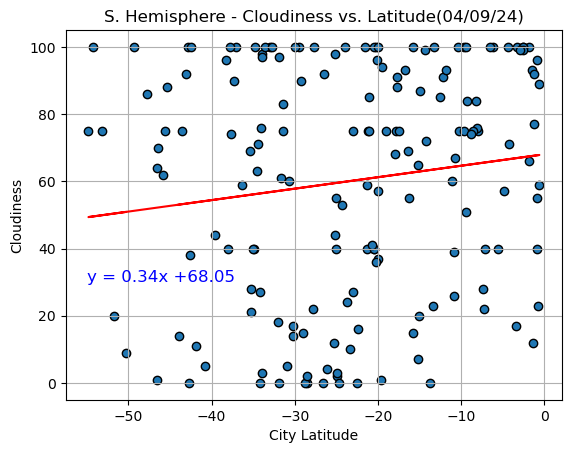

r-square << 0.7. The city latitue at southern hemisphere shows no correlation with Cloudiness


In [61]:
# Declare variables 
x_values = South_hem["Lat"]
y_values = South_hem["Cloudiness"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("S. Hemisphere - Cloudiness vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.annotate(line_eq,xy=(-55,30),fontsize=12,color="blue")

#Save the figure
plt.savefig("../output_data/S_Cloudiness_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at southern hemisphere shows no correlation with Cloudiness")

Northern Hemisphere: Wind Speed vs. Latitude Linear Regression

r-square: 0.015631724239648797


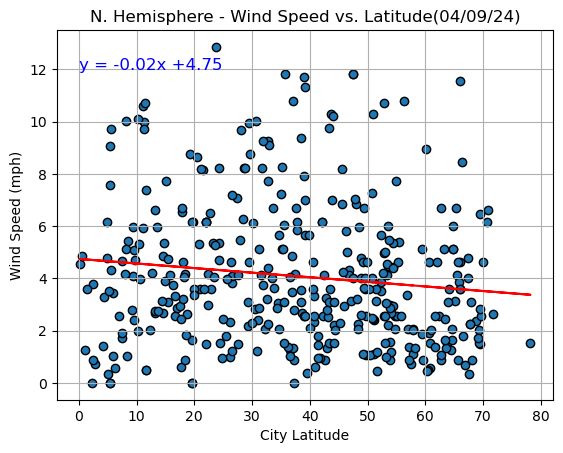

r-square << 0.7. The city latitue at northern hemisphere shows no correlation with Wind Speed


In [64]:
# Declare variables 
x_values = North_hem["Lat"]
y_values = North_hem["Wind Speed"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("N. Hemisphere - Wind Speed vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.annotate(line_eq,xy=(0,12),fontsize=12,color="blue")

#Save the figure
plt.savefig("../output_data/N_Wind Speed_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at northern hemisphere shows no correlation with Wind Speed")

Southern Hemisphere: Wind Speed vs. Latitude Linear Regression

r-square: 0.15395312129829988


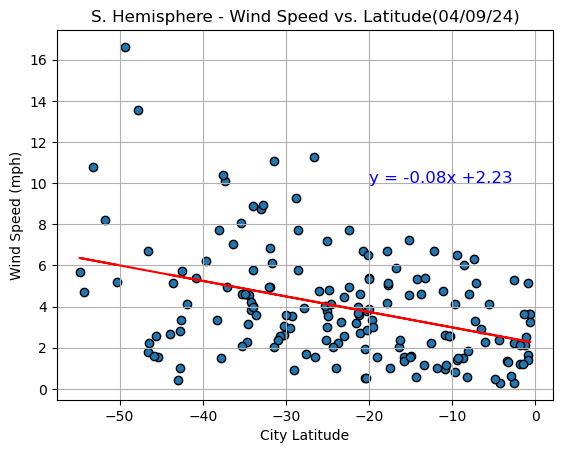

r-square << 0.7. The city latitue at southern hemisphere shows no correlation with Wind Speed


In [66]:
# Declare variables 
x_values = South_hem["Lat"]
y_values = South_hem["Wind Speed"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("S. Hemisphere - Wind Speed vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.annotate(line_eq,xy=(-20,10),fontsize=12,color="blue")

#Save the figure
plt.savefig("../output_data/S_Wind Speed_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at southern hemisphere shows no correlation with Wind Speed")